# Numpy 3

## **Content**

- Sorting
- Matrix Multiplication
  - `np.dot`
  - `@` operator
  - `np.matmul`
- Vectorization
- Broadcasting

## Sorting

- `np.sort` returns a sorted copy of an array.

In [1]:
import numpy as np

In [2]:
a = np.array([4, 7, 0, 3, 8, 2, 5, 1, 6, 9])
a

array([4, 7, 0, 3, 8, 2, 5, 1, 6, 9])

In [3]:
b = np.sort(a)
b

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
a # no change is reflected in the original array

array([4, 7, 0, 3, 8, 2, 5, 1, 6, 9])

#### We can directly call `sort` method on array but it can change the original array as it is an inplace operation.

In [5]:
a.sort() # sorting is performed inplace
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### **Sorting in 2D array**

In [6]:
a = np.array([[1,5,3], [2,5,7], [400, 200, 300]])
a

array([[  1,   5,   3],
       [  2,   5,   7],
       [400, 200, 300]])

In [7]:
np.sort(a, axis=0) # sorting every column

array([[  1,   5,   3],
       [  2,   5,   7],
       [400, 200, 300]])

In [8]:
np.sort(a, axis=1) # sorting every row

array([[  1,   3,   5],
       [  2,   5,   7],
       [200, 300, 400]])

**Note**: By default, the `np.sort()` functions sorts along the last axis.

In [9]:
a = np.array([[23,4,43], [12, 89, 3], [69, 420, 0]])

In [10]:
np.sort(a) # default axis = -1 (last axis)

array([[  4,  23,  43],
       [  3,  12,  89],
       [  0,  69, 420]])

## **Element-Wise Multiplication**

Element-wise multiplication in NumPy involves multiplying corresponding elements of two arrays with the same shape to produce a new array where each element is the product of the corresponding elements from the input arrays.

In [11]:
a = np.arange(1, 6)
a

array([1, 2, 3, 4, 5])

In [12]:
a * 5

array([ 5, 10, 15, 20, 25])

In [13]:
b = np.arange(6, 11)
b

array([ 6,  7,  8,  9, 10])

In [14]:
a * b

array([ 6, 14, 24, 36, 50])

Both arrays should have the same shape.

In [15]:
c = np.array([1, 2, 3])

In [16]:
a * c

ValueError: operands could not be broadcast together with shapes (5,) (3,) 

In [17]:
d = np.arange(12).reshape(3, 4)
e = np.arange(13, 25).reshape(3, 4)

In [18]:
print("d=", d)
print("e=", e)

d= [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
e= [[13 14 15 16]
 [17 18 19 20]
 [21 22 23 24]]


In [19]:
d * e

array([[  0,  14,  30,  48],
       [ 68,  90, 114, 140],
       [168, 198, 230, 264]])

**Takeaway:**

- Array * Number -> WORKS
- Array * Array (same shape) -> WORKS
- Array * Array (different shape) -> DOES NOT WORK

## **Matrix Multiplication**

**Rule:** Number of columns of the first matrix should be equal to number of rows of the second matrix.

- (A,B) * (B,C) -> (A,C)
- (3,4) * (4,3) -> (3,3)

Visual Demo: https://www.geogebra.org/m/ETHXK756

In [20]:
a = np.arange(1,13).reshape((3,4))
c = np.arange(2,14).reshape((4,3))

In [21]:
a.shape, c.shape

((3, 4), (4, 3))

##### `a` is of shape (3,4) and `c` is of shape (4,3). The output will be of shape (3,3).

In [22]:
# Using np.dot
np.dot(a,c)

array([[ 80,  90, 100],
       [184, 210, 236],
       [288, 330, 372]])

In [23]:
# Using np.matmul
np.matmul(a,c)

array([[ 80,  90, 100],
       [184, 210, 236],
       [288, 330, 372]])

In [24]:
# Using @ operator
a@c

array([[ 80,  90, 100],
       [184, 210, 236],
       [288, 330, 372]])

In [25]:
a@5

ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [26]:
np.matmul(a, 5)

ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [27]:
np.dot(a, 5)

array([[ 5, 10, 15, 20],
       [25, 30, 35, 40],
       [45, 50, 55, 60]])

**Important:**

- `dot()` function supports the vector multiplication with a scalar value, which is not possible with `matmul()`.
- `Vector * Vector` will work for `matmul()` but `Vector * Scalar` won't.

## **Vectorization**

Vectorization in NumPy refers to performing operations on entire arrays or array elements simultaneously, which is significantly faster and more efficient than using explicit loops.

In [28]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**Note:**
- 1d np array --> vector
- 2d np array --> matrix
- 3d onwards --> tensors

In [29]:
def random_operation(x):
    if x % 2 == 0:
        x += 2
    else:
        x -= 2

    return x

In [30]:
random_operation(a)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [31]:
cool_operation = np.vectorize(random_operation)

In [32]:
type(cool_operation)

numpy.vectorize

#### `np.vectorize()`

- It is a generalised function for vectorization.
- It takes the function and returns an object (which acts like function but can take an array as input and perform the operations).

In [33]:
cool_operation(a)

array([ 2, -1,  4,  1,  6,  3,  8,  5, 10,  7])

## **Broadcasting**

Broadcasting in NumPy is the automatic and implicit extension of array dimensions to enable element-wise operations between arrays with different shapes.

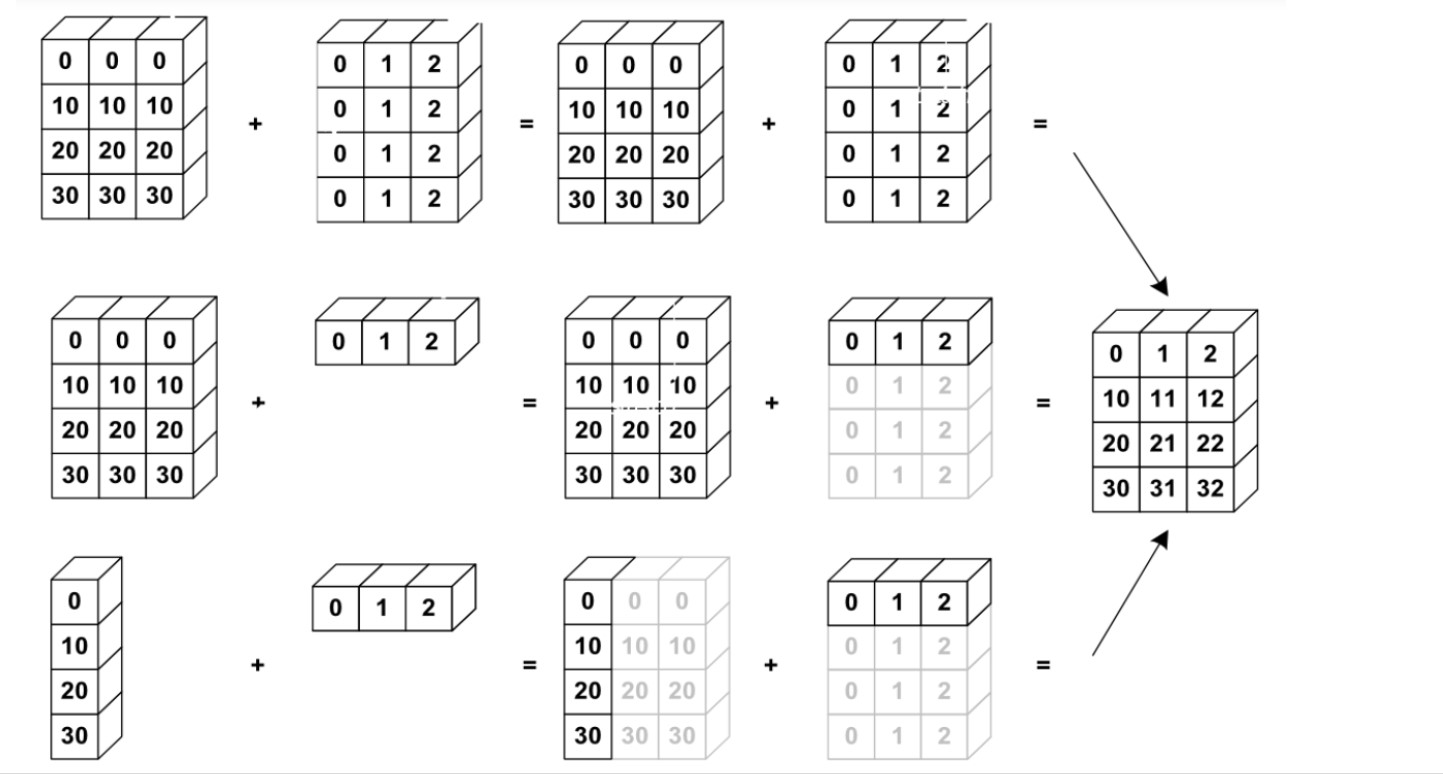

In [34]:
from IPython.display import Image
Image(filename='broadcasting.jpeg')


#### **Case 1:** If dimension in both matrix is equal, element-wise addition will be done.

In [35]:
a = np.tile(np.arange(0,40,10), (3,1))
a

array([[ 0, 10, 20, 30],
       [ 0, 10, 20, 30],
       [ 0, 10, 20, 30]])

**Note:**

* `numpy.tile(array, reps)` constructs an array by repeating A the number of times given by reps along each dimension.
* `np.tile(array, (repetition_rows, repetition_cols))`


In [36]:
a=a.T
a 

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [37]:
b = np.tile(np.arange(0,3), (4,1))
b 

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [38]:
print(a.shape, b.shape)

(4, 3) (4, 3)


Since a and b have the same shape, they can be added without any issues.

In [39]:
a+b 

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

#### **Case 2:** Right array should be of 1-D and number of columns should be same of both the arrays and it will automatically do n-tile.

In [40]:
a 

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [41]:
c = np.array([0,1,2])
c

array([0, 1, 2])

In [42]:
print(a.shape, c.shape)

(4, 3) (3,)


In [43]:
a + c 

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

- c was broadcasted along rows (vertically)
- so that a and c can be made compatible

#### **Case 3:** If the left array is column matrix (must have only 1 column) and right array is row matrix, then it will do the n-tile such that element wise addition is possible.

In [44]:
d = np.array([0,10,20,30]).reshape(4,1)
d 

array([[ 0],
       [10],
       [20],
       [30]])

In [45]:
c = np.array([0,1,2])
c 

array([0, 1, 2])

In [46]:
print(d.shape, c.shape) 

(4, 1) (3,)


In [47]:
d + c 

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

- d was stacked (broadcasted) along columns (horizontally)
- c was stacked (broadcasted) along rows (vertically) 

**Will broadcasting work in this case?**




In [48]:
a = np.arange(8).reshape(2,4)
a 

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [49]:
b = np.arange(16).reshape(4,4)
b 

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [50]:
a+b 

ValueError: operands could not be broadcast together with shapes (2,4) (4,4) 

#### Broadcasting in 2D Arrays

- A + A (same shape)-> Works
- A + A (1D) -> Works
- A + number -> Works
- A + A (different shape but still 2D) -> DOES NOT WORK 

**Is broadcasting possible in this case?** 

In [51]:
A = np.arange(1,10).reshape(3,3)
A 

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [52]:
B = np.array([-1, 0, 1])
B 

array([-1,  0,  1])

In [53]:
A*B 

array([[-1,  0,  3],
       [-4,  0,  6],
       [-7,  0,  9]])

Yes! Broadcasting is possible for all the operations.



 

In [54]:
A = np.arange(12).reshape(3, 4)
A 

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [55]:
B = np.array([1, 2, 3])
B 

array([1, 2, 3])

In [56]:
A + B 

ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

**Why did it throw an error?**

Are the number of dimensions same for both array? No.
- Shape of A $\Rightarrow$ (3,4)
- Shape of B $\Rightarrow$ (3,)

So, `Rule 1` will be invoked to pad 1 to the shape of B.

So, the shape of B becomes **(1,3)**.

\
Now, we check whether broadcasting conditions are met or not?

Starting from the right most side,
- Right most dimension is not equal (4 and 3).

Hence, broadcasting is not possible as per `Rule 3`. 

**Question:** Given two arrays,
1. Array A of shape  (8, 1, 6, 1)
2. Array B of shape (7, 1, 5)

Is broadcasting possible in this case? If yes, what will be the shape of output?

**Answer:** Broadcasting possible; Shape will be (8, 7, 6, 5)

**Explanation:**

As number of dimensions are not equal, `Rule 1` is invoked.

The shape of B becomes (1, 7, 1, 5)

Next, it checks whether broadcasting is possible.

A $\Rightarrow$ (8 , 1, 6, 1) \
B $\Rightarrow$ (1, 7, 1, 5)

- Right most dimension, one of the dimension is 1 (1 vs 5)
- Next, comparing 6 and 1, We have one dimension as 1
- Similarly, we have one of the dimension as 1 in both leading dimensions.

Hence, broadcasting is possible.

Now, as per `Rule 2`, dimension with value 1 is streched to match dimension of other array.

- Right most dimension of array is streched to match 5
- Leading dimension of array B (1) is streched to match array A dim (6)

So, the output shape becomes : `(8, 7, 6, 5)`.